<a href="https://colab.research.google.com/github/pttrupt/KPMG-virtual-internship-/blob/main/KPMG_Task_2_(learned).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1

# Data Quality Assessment
######  Assessmentn of the data quality and completeness in preparation for analysis 

> Datasets contains four tables 
- Transactions 
- CustomerAddress 
- NewCustorList
- CustomerDemographic

###  Standard Data Qulaity Dimensions 

- Correct Values | Accuracy 
- Data Fields with Values | Completeness 
- Values Free from Contradiction | Consistency 
- Data Items with Value Meta-data | Relevancy 
- Data Containing Allowable Values | Validity 
- Records that are Duplicated | Uniqueness 



### Import libraries 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
plt.style.use("seaborn-darkgrid")

### Read the Dataset

In [7]:
data_file = pd.ExcelFile("KPMG_VI_New_raw_data_update_final.xlsx")

In [8]:
trans = pd.read_excel(data_file, sheet_name=1, header=1)
c_list = pd.read_excel(data_file, sheet_name=2, header=1)
c_Demo = pd.read_excel(data_file, sheet_name=3, header=1)
c_Add = pd.read_excel(data_file, sheet_name=4, header=1)

### Transactions 

- 20,000 rows and 13 columns 
- Columns which contains missing values
  - online_order   |             360
  - brand          |              197
  - product_line   |              197
  - product_class  |            197
  - product_size   |           197
  - standard_cost  |           197
  - product_first_sold_date |   197
- 3494 unique customer_id 
- transaction in dataset from 2017-01-01 to 2017-12-31

In [9]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [10]:
trans.shape

(20000, 13)

In [11]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [12]:
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [13]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [14]:
trans.customer_id.value_counts()

2183    14
1068    14
2476    14
2072    13
1672    13
        ..
2395     1
1569     1
1203     1
2271     1
1544     1
Name: customer_id, Length: 3494, dtype: int64

In [15]:
trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [16]:
trans.transaction_date.sort_values()

516     2017-01-01
5876    2017-01-01
3459    2017-01-01
12484   2017-01-01
19130   2017-01-01
           ...    
605     2017-12-30
15269   2017-12-30
19906   2017-12-30
15756   2017-12-30
12003   2017-12-30
Name: transaction_date, Length: 20000, dtype: datetime64[ns]

In [17]:
trans.duplicated().any()

False

In [18]:
trans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [19]:
trans.product_class.value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [20]:
trans.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [21]:
trans.brand.value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [22]:
trans.product_line.value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

### CustomerList

- 1000 rows, 23 columns 
- 317 missing values in dataset
- many customer has incorrect DOB 
- Duplicate columns `Unnamed:20` and  `Rank`


In [23]:
c_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [24]:
c_list.shape

(1000, 23)

In [25]:
c_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [26]:
c_list.isnull().sum().sum()

317

In [27]:
c_list.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.747340,0.839005,0.942673,0.870514,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.205082,0.248858,0.294832,0.280891,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.637500,0.712500,0.658750,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.820000,0.912500,0.842625,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.920000,1.031875,1.142969,1.062500,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [28]:
c_list.job_title.value_counts()

Associate Professor              15
Software Consultant              14
Environmental Tech               14
Chief Design Engineer            13
Cost Accountant                  12
                                 ..
Computer Systems Analyst II       1
Staff Accountant II               1
Human Resources Assistant III     1
Human Resources Assistant I       1
Systems Administrator II          1
Name: job_title, Length: 184, dtype: int64

In [29]:
c_list.job_industry_category.value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [30]:
c_list.duplicated().any()

False

In [31]:
c_list.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [32]:
c_list.country.value_counts()

Australia    1000
Name: country, dtype: int64

In [33]:
c_list.DOB.sort_values().sample(10)

365   1981-08-17
8     1972-04-28
502   1974-08-19
340   1969-10-09
337   1976-01-24
563   1967-04-07
531   1981-09-14
9     1985-08-02
711   1983-05-18
463   1965-02-03
Name: DOB, dtype: datetime64[ns]

In [34]:
postcode = np.sort(c_list.postcode.unique())

In [35]:
postcode

array([2000, 2007, 2009, 2010, 2011, 2015, 2016, 2017, 2019, 2022, 2024,
       2025, 2026, 2028, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2038,
       2042, 2046, 2047, 2049, 2050, 2062, 2066, 2067, 2068, 2069, 2070,
       2071, 2072, 2073, 2074, 2075, 2076, 2077, 2082, 2088, 2089, 2090,
       2092, 2093, 2096, 2097, 2099, 2101, 2103, 2104, 2107, 2110, 2111,
       2112, 2113, 2114, 2117, 2118, 2120, 2121, 2122, 2125, 2126, 2127,
       2128, 2130, 2134, 2135, 2137, 2138, 2140, 2141, 2142, 2144, 2145,
       2146, 2147, 2148, 2151, 2153, 2154, 2155, 2156, 2158, 2160, 2161,
       2163, 2164, 2165, 2166, 2168, 2170, 2171, 2173, 2176, 2177, 2190,
       2192, 2193, 2194, 2195, 2196, 2197, 2199, 2200, 2203, 2205, 2207,
       2209, 2210, 2211, 2212, 2213, 2217, 2218, 2219, 2220, 2221, 2222,
       2223, 2224, 2226, 2227, 2228, 2230, 2231, 2232, 2233, 2234, 2250,
       2251, 2256, 2257, 2258, 2259, 2261, 2262, 2263, 2280, 2281, 2284,
       2287, 2289, 2290, 2291, 2292, 2298, 2300, 23

In [36]:
c_list.owns_car.value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

### CustomerDemographic

- 4000 rows, 13 columns 
- Columns that contains missing values
  - DOB           |     87
  - tenure        |    87
  - last_name     |    125
  - default       |    302
  - job_title     |    506
  - job_industry_category   |656

- uncleared data column `default`
- inaccurate birth date's in `DOB` column
- inconsistent name in `gender` columns for the same attributes 

In [37]:
c_Demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [38]:
c_Demo.shape

(4000, 13)

In [39]:
c_Demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [40]:
c_Demo.isnull().sum().sort_values()

customer_id                              0
first_name                               0
gender                                   0
past_3_years_bike_related_purchases      0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
DOB                                     87
tenure                                  87
last_name                              125
default                                302
job_title                              506
job_industry_category                  656
dtype: int64

In [41]:
c_Demo.duplicated("customer_id").any()

False

In [42]:
c_Demo.owns_car.value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [43]:
c_Demo.DOB.sort_values()

33     1843-12-21
719    1931-10-23
1091   1935-08-22
3409   1940-09-22
2412   1943-08-11
          ...    
3778          NaT
3882          NaT
3930          NaT
3934          NaT
3997          NaT
Name: DOB, Length: 4000, dtype: datetime64[ns]

In [44]:
c_Demo.wealth_segment.value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

### CustomerAddress 

- 3999 rows, 6 columns 
- no duplicated data 
- Inconsistent values for the same attribute in State columns

In [45]:
c_Add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [46]:
c_Add.shape

(3999, 6)

In [47]:
c_Add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [48]:
c_Add.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [49]:
c_Add.duplicated("customer_id").any()

False

In [50]:
c_Add.country.value_counts()

Australia    3999
Name: country, dtype: int64

In [51]:
c_Add.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

# Task 2 

## Data Insights 
#### Targeting high values customers based on customer demographics and attributes.

> Three things to look after 
  - Data Exploration 
  - Model devlopment 
  - Interpretation 


#### Detailed Approach to completing the analysis 
- Understanding the data distribution 
- Feature engineering 
- Data transformation 
- Modelling 
- Result interpretation 
- Reporting 

### Clean the Data 

##### Transaction

In [52]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

##### Customer Demographic 

In [53]:
c_Demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [54]:
c_Demo = c_Demo.dropna(axis=0, subset=['DOB'])

In [55]:
c_Demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   first_name                           3913 non-null   object        
 2   last_name                            3792 non-null   object        
 3   gender                               3913 non-null   object        
 4   past_3_years_bike_related_purchases  3913 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3416 non-null   object        
 7   job_industry_category                3257 non-null   object        
 8   wealth_segment                       3913 non-null   object        
 9   deceased_indicator                   3913 non-null   object        
 10  default     

In [56]:
c_Demo.drop(columns=["default"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
c_Demo["Age"] = (pd.to_datetime("now") - c_Demo["DOB"]).astype("<m8[Y]")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
c_Demo["Age_class"] = (round(c_Demo["Age"] / 10) * 10).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
gender_dict = {'F':'Female', 'Femal':'Female', 'M':'Male'}
c_Demo.replace({"gender":gender_dict}, inplace=True )

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


##### Customer Address 

In [60]:
c_Add.state = c_Add.state.str.replace("NSW", "New South Wales").replace( "VIC","Victoria").replace("QLD", "Queensland")

##### New customer list 

In [61]:
c_list.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [62]:
c_list = c_list.dropna(axis=0, subset=["DOB"])

In [63]:
c_list.drop(columns=["Unnamed: 20"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
c_list["Age"] = (pd.to_datetime("now") - c_list["DOB"]).astype("<m8[Y]")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
c_list["Age_class"] = (round(c_list["Age"]/10) * 10).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Profit 

In [66]:
trans["profit"] = trans.list_price - trans.standard_cost

### Recency, Frequency and Monetary Value Analysis

In [67]:
most_recent = trans.transaction_date.max()

trans["last_purchase_days_before"] = most_recent - trans.transaction_date
trans["last_purchase_days_before"] /= np.timedelta64(1, 'D')

In [68]:
trans["last_purchase_days_before"] = trans["last_purchase_days_before"].astype(int)

In [69]:
### Create RFM table

RFM_table = trans.groupby("customer_id").agg(
    {"last_purchase_days_before": lambda x: x.min(), 
     "customer_id": lambda x: len(x), 
     "profit" : lambda x: x.sum().round(2)
     })

In [70]:
# rename the columns name
columns = {"last_purchase_days_before":"recency", 
           "customer_id": "frequency",
           "profit": "monetary_value"}
RFM_table.rename(columns=columns, inplace=True)

In [71]:
RFM_table.head()

,recency,frequency,monetary_value
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94


In [72]:
rfm_percentile = RFM_table.describe()[4:-1]
rfm_percentile

,recency,frequency,monetary_value
25%,17.0,4.0,1841.3700
50%,44.0,6.0,2861.9800
75%,85.0,7.0,4183.1075


In [73]:
rfm_percentile["recency"]["25%"]

17.0

In [74]:
# Function that return Recency score, Frequency score, Monetary value

def recency_score(x, p, data):
  
  if x <= data[p][0]:
    return 1 
  elif x <= data[p][1]:
    return 2 
  elif x <= data[p][2]:
    return 3
  else:
    return 4 


def frq_monet_score(x, p, data):

  if x <= data[p][0]:
    return 4 
  elif x <= data[p][1]:
    return 3 
  elif x <= data[p][2]:
    return 2
  else:
    return 1 

In [75]:
RFM_table['rency_score'] = RFM_table['recency'].apply(recency_score, args=('recency', rfm_percentile))
RFM_table['freq_score'] = RFM_table['frequency'].apply(frq_monet_score, args=('frequency', rfm_percentile))
RFM_table['monet_score'] = RFM_table['monetary_value'].apply(frq_monet_score, args=('monetary_value', rfm_percentile))

In [76]:
RFM_table["rfm_class"] = RFM_table["rency_score"] * 100 + RFM_table["freq_score"] * 10 + RFM_table["monet_score"]
RFM_table["total_score"] = RFM_table["rency_score"] + RFM_table["freq_score"] + RFM_table["monet_score"]

In [77]:
RFM_table

,recency,frequency,monetary_value,rency_score,freq_score,monet_score,rfm_class,total_score
customer_id,,,,,,,,
1,7,11,3018.09,1,1,2,112,4
2,128,3,2226.26,4,4,3,443,11
3,102,8,3362.81,4,1,2,412,7
4,195,2,220.57,4,4,4,444,12
5,16,6,2394.94,1,3,3,133,7
...,...,...,...,...,...,...,...,...
3497,52,3,1648.32,3,4,4,344,11
3498,127,6,3147.33,4,3,2,432,9
3499,51,7,4955.25,3,2,1,321,6


In [78]:
# 5 number summary of rfm_class column 
c_class_percentile = RFM_table.rfm_class.describe()[3:]
c_class_percentile

min    111.0
25%    144.0
50%    244.0
75%    344.0
max    444.0
Name: rfm_class, dtype: float64

In [79]:
def customer_class(x, p, d):
    if x <= d[0]:
        return 'Platinum'
    elif x <= d[1]:
        return 'Gold'
    elif x <= d[2]: 
        return 'Silver'
    else: 
        return 'Bronze'

In [80]:
RFM_table['customer_title'] = RFM_table['rfm_class'].apply(customer_class, args=('rfm_class', c_class_percentile))

In [81]:
RFM_table.head()

,recency,frequency,monetary_value,rency_score,freq_score,monet_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7,11,3018.09,1,1,2,112,4,Gold
2,128,3,2226.26,4,4,3,443,11,Bronze
3,102,8,3362.81,4,1,2,412,7,Bronze
4,195,2,220.57,4,4,4,444,12,Bronze
5,16,6,2394.94,1,3,3,133,7,Gold


### Merge Dataset

In [82]:
merge_df = c_Demo.merge(RFM_table, 
                       how='inner',
                       on='customer_id').merge(c_Add,
                                               how='inner', 
                                               on='customer_id')

In [83]:
merge_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_class,recency,frequency,monetary_value,rency_score,freq_score,monet_score,rfm_class,total_score,customer_title,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,68.0,70,7,11,3018.09,1,1,2,112,4,Gold,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,41.0,40,128,3,2226.26,4,4,3,443,11,Bronze,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,60.0,60,195,2,220.57,4,4,4,444,12,Bronze,0 Holy Cross Court,4211,Queensland,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,44.0,40,16,6,2394.94,1,3,3,133,7,Gold,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,55.0,60,64,5,3946.55,3,3,2,332,8,Bronze,9 Oakridge Court,3216,Victoria,Australia,9


In [84]:
def percent_numb(plot, total_num, count=True, percent=False, l_r=0.1, u_d=50):

  for p in plot.patches:
    
    if count and percent:
      txt = str((p.get_height()*100 / total_num).round(2)) + '%' + " (" + str(p.get_height()) + ")"
    elif count and not percent:
      txt = str(p.get_height())
    else:
      txt = str((p.get_height()*100 / total_num).round(2)) + '%'

    txt_x = p.get_x()
    txt_y = p.get_height() 
    plot.text(txt_x+l_r ,txt_y+u_d, txt)
    

### Number of Customer in each Customer class

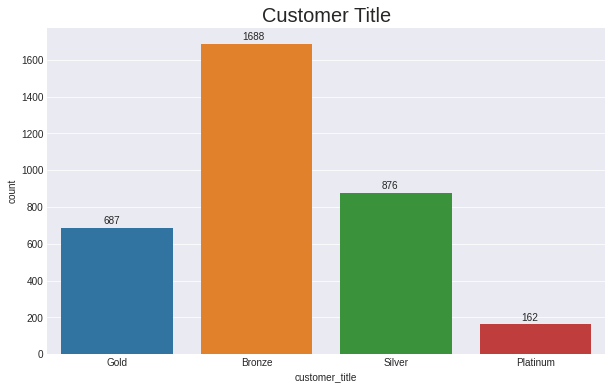

In [85]:
plt.figure(figsize=(10,6))
customer_title = sns.countplot(x='customer_title', data=merge_df)
plt.title("Customer Title", fontsize=20)
percent_numb(customer_title, len(merge_df), count=True, l_r=0.3, u_d=20)


### Age Class with Wealth Segment 

In [86]:
merge_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'Age_class', 'recency', 'frequency',
       'monetary_value', 'rency_score', 'freq_score', 'monet_score',
       'rfm_class', 'total_score', 'customer_title', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

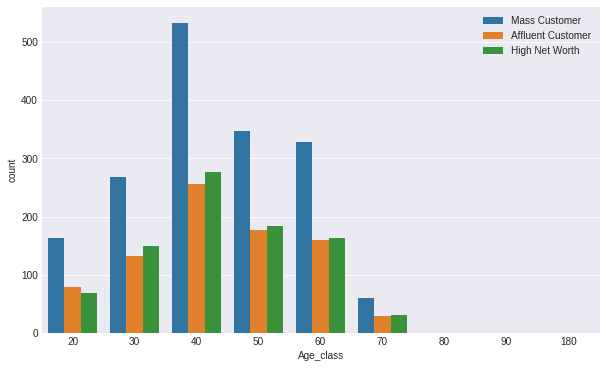

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(x='Age_class', hue='wealth_segment', data=merge_df)
plt.legend(loc='upper right')

### Job Industry 

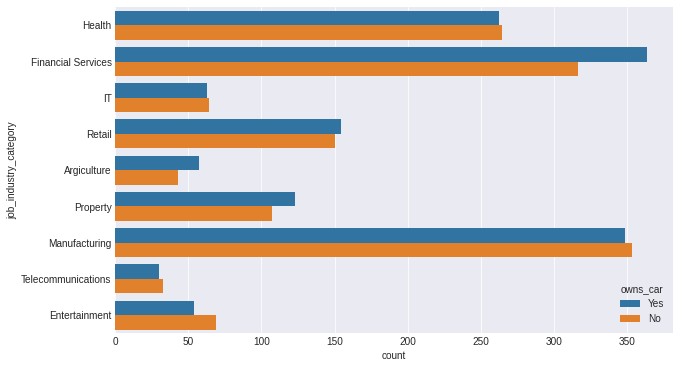

In [88]:
plt.figure(figsize=(10,6))
sns.countplot(y='job_industry_category', hue='owns_car', data=merge_df)

### States with cutomer title

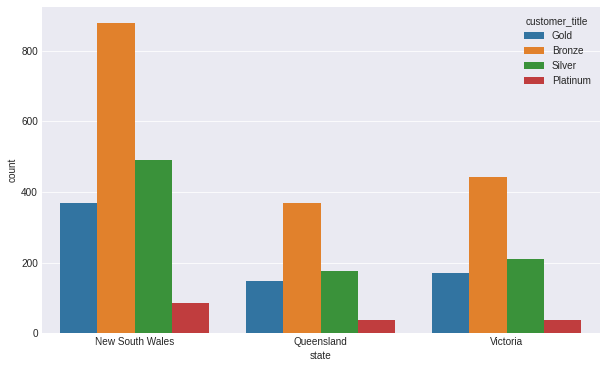

In [89]:
plt.figure(figsize=(10,6))
sns.countplot(x='state', hue='customer_title', data=merge_df)

### Customer Segment 

In [90]:
mapping = { 3: 'Platinum',
            4: 'Very Loyal',
            5: 'Becoming Loyal',
            6: 'Recent',
            7: 'Average',
            8: 'High Risk',
            9: 'Evasive',
            10: 'Losing',
            11: 'Inactive',
            12: 'Lost'}

merge_df["customer segment"] = merge_df["total_score"].map(mapping)

### save clean data

In [91]:
merge_df.to_csv("clean_data.csv")